In [1]:
%load_ext watermark
import logging
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import qmc
from tqdm import tqdm
import random
from API.ES import evolutionary_strategy

In [2]:
%watermark -u -n -t -z -a 'Francisco Zanartu' -v -m -iv

Author: Francisco Zanartu

Last updated: Thu Nov 10 2022 14:13:22ACDT

Python implementation: CPython
Python version       : 3.9.13
IPython version      : 8.4.0

Compiler    : Clang 13.0.1 
OS          : Darwin
Release     : 21.6.0
Machine     : arm64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

logging   : 0.5.1.2
sys       : 3.9.13 | packaged by conda-forge | (main, May 27 2022, 17:00:33) 
[Clang 13.0.1 ]
numpy     : 1.22.4
matplotlib: 3.5.2
scipy     : 1.8.1
pandas    : 1.4.2
networkx  : 2.7.1



In [3]:
ds = pd.read_json('/Users/francisco/Library/CloudStorage/GoogleDrive-fzanartua@gmail.com/My Drive/Socialz/COBOL/all_cobol_events_2011_2021.json', lines=True)
ds = ds[ds['type'].isin(['ForkEvent','WatchEvent','PullRequestEvent','PushEvent'])]
ds['actor'] = ds['actor'].apply(lambda x: x.get('login'))
ds['repo'] = ds['repo'].apply(lambda x:x.get('name'))
ds = ds[['actor', 'repo', 'type']].rename(columns={'actor':'source', 'repo':'target'})

# Add user (u: ) repo (r: ) indicator for each node
ds['source'] = ds['source'].apply(lambda x: 'u: '+x)
ds['target']  = ds['target'].apply(lambda x: 'r: '+x)

ds

,source,target,type
0,u: blreay,r: blreay/test,PushEvent
1,u: CobViktor,r: janilisch/CobolGruppe,PushEvent
2,u: gigglegile,r: gigglegile/MavenSonarQube,PushEvent
3,u: krisds,r: krisds/koopa,PushEvent
5,u: tagadatsointsoin,r: tagadatsointsoin/project2,PullRequestEvent
...,...,...,...
60840,u: RosesTheN00b,r: RosesTheN00b/gradle-cobol-plugin-unittest-e...,PushEvent
60841,u: RosesTheN00b,r: RosesTheN00b/gradle-cobol-plugin-unittest-e...,PushEvent
60842,u: RosesTheN00b,r: RosesTheN00b/gradle-cobol-plugin-unittest-e...,PushEvent
60843,u: RosesTheN00b,r: RosesTheN00b/gradle-cobol-plugin-unittest-e...,PushEvent


In [4]:
df = pd.read_csv('Data/cobol_pullrequests.csv', usecols= ['login','name'])

# Add user (u: ) repo (r: ) indicator for each node
df['login'] = df['login'].apply(lambda x: 'u: '+x)
df['name']  = df['name'].apply(lambda x: 'r: '+x)

#Rename columns
df = df.rename(columns={"login":"source","name":"target"})
df['type'] = np.random.choice(['ForkEvent','WatchEvent','PullRequestEvent','PushEvent'],1333)
df

,source,target,type
0,u: vim-sroberge,r: vimaec/g3d,PushEvent
1,u: vim-sroberge,r: vimaec/g3d,PushEvent
2,u: vim-sroberge,r: vimaec/g3d,PullRequestEvent
3,u: vim-sroberge,r: vimaec/g3d,PushEvent
4,u: mavimaec,r: vimaec/g3d,PushEvent
...,...,...,...
1328,u: joe-tingsanchali-sonarsource,r: SonarSource/sonar-scanning-examples,ForkEvent
1329,u: joe-tingsanchali-sonarsource,r: SonarSource/sonar-scanning-examples,WatchEvent
1330,u: joe-tingsanchali-sonarsource,r: SonarSource/sonar-scanning-examples,PushEvent
1331,u: joe-tingsanchali-sonarsource,r: SonarSource/sonar-scanning-examples,WatchEvent


In [5]:
es = evolutionary_strategy(df, cpus=8)

In [6]:
niter, best, best_eval = es.es_plus(1000, 1, 20)

10-Nov-22 14:13:37 - n_iter: 0, score: 0.29658, sample_size: 1
10-Nov-22 14:13:39 - n_iter: 1, score: 0.29319, sample_size: 4
10-Nov-22 14:13:40 - n_iter: 2, score: 0.28732, sample_size: 5
10-Nov-22 14:13:41 - n_iter: 3, score: 0.27685, sample_size: 10
10-Nov-22 14:13:42 - n_iter: 4, score: 0.26359, sample_size: 15
10-Nov-22 14:13:43 - n_iter: 5, score: 0.25248, sample_size: 30
10-Nov-22 14:13:45 - n_iter: 6, score: 0.23736, sample_size: 73
10-Nov-22 14:13:50 - n_iter: 10, score: 0.22411, sample_size: 13
10-Nov-22 14:13:52 - n_iter: 11, score: 0.21382, sample_size: 30
10-Nov-22 14:13:53 - n_iter: 12, score: 0.20422, sample_size: 65
10-Nov-22 14:13:58 - n_iter: 16, score: 0.20064, sample_size: 17
10-Nov-22 14:14:00 - n_iter: 17, score: 0.18994, sample_size: 34
10-Nov-22 14:14:01 - n_iter: 18, score: 0.18454, sample_size: 76
10-Nov-22 14:14:07 - n_iter: 22, score: 0.17823, sample_size: 14
10-Nov-22 14:14:08 - n_iter: 23, score: 0.17248, sample_size: 38
10-Nov-22 14:14:10 - n_iter: 24, sc

In [ ]:
es.combinations

{('PullRequestEvent',): 1,
 ('PushEvent',): 2,
 ('WatchEvent',): 3,
 ('ForkEvent',): 4,
 ('PullRequestEvent', 'PushEvent'): 5,
 ('PullRequestEvent', 'WatchEvent'): 6,
 ('ForkEvent', 'PullRequestEvent'): 7,
 ('PushEvent', 'WatchEvent'): 8,
 ('ForkEvent', 'PushEvent'): 9,
 ('ForkEvent', 'WatchEvent'): 10,
 ('PullRequestEvent', 'PushEvent', 'WatchEvent'): 11,
 ('ForkEvent', 'PullRequestEvent', 'PushEvent'): 12,
 ('ForkEvent', 'PullRequestEvent', 'WatchEvent'): 13,
 ('ForkEvent', 'PushEvent', 'WatchEvent'): 14,
 ('ForkEvent', 'PullRequestEvent', 'PushEvent', 'WatchEvent'): 15}

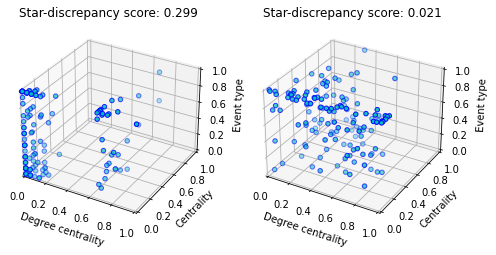

In [ ]:
def draw_plot(ax, data):
    
    ax = ax or plt.gca()
    
    aux = es.graph_metrics(data)
    ax.scatter3D(aux['Degree'], aux['Centrality'], aux['Values'], edgecolor='b', c='c')
    ax.set_xlabel('Degree centrality')
    ax.set_ylabel('Centrality')
    ax.set_zlabel('Event type')
    ax.set_title(f'Star-discrepancy score: {es.objective(data):.3f}')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([0, 1])
    plt.close()
    
    return ax


fig, ((ax1,ax2)) = plt.subplots(1,2, figsize=(8,4), subplot_kw=dict(projection="3d"))
ax1 = draw_plot(ax1, df)
ax2 = draw_plot(ax2, best)
plt.close()

fig

In [ ]:
df = pd.read_csv('Data/cobol_pullrequests.csv', usecols= ['login','name'])

# Add user (u: ) repo (r: ) indicator for each node
df['login'] = df['login'].apply(lambda x: 'u: '+x)
df['name']  = df['name'].apply(lambda x: 'r: '+x)

#Rename columns
df = df.rename(columns={"login":"source","name":"target"})
df

,source,target
0,u: vim-sroberge,r: vimaec/g3d
1,u: vim-sroberge,r: vimaec/g3d
2,u: vim-sroberge,r: vimaec/g3d
3,u: vim-sroberge,r: vimaec/g3d
4,u: mavimaec,r: vimaec/g3d
...,...,...
1328,u: joe-tingsanchali-sonarsource,r: SonarSource/sonar-scanning-examples
1329,u: joe-tingsanchali-sonarsource,r: SonarSource/sonar-scanning-examples
1330,u: joe-tingsanchali-sonarsource,r: SonarSource/sonar-scanning-examples
1331,u: joe-tingsanchali-sonarsource,r: SonarSource/sonar-scanning-examples


In [ ]:
es = evolutionary_strategy(df, cpus=8)
niter, best, best_eval = es.es_plus(1000, 1, 20)

09-Nov-22 08:31:52 - n_iter: 0, score: 0.53291
09-Nov-22 08:31:52 - n_iter: 1, score: 0.52256
09-Nov-22 08:31:53 - n_iter: 2, score: 0.51238
09-Nov-22 08:31:53 - n_iter: 3, score: 0.49945
09-Nov-22 08:31:53 - n_iter: 4, score: 0.48665
09-Nov-22 08:31:53 - n_iter: 5, score: 0.47565
09-Nov-22 08:31:54 - n_iter: 6, score: 0.46286
09-Nov-22 08:31:54 - n_iter: 7, score: 0.45320
09-Nov-22 08:31:55 - n_iter: 8, score: 0.44330
09-Nov-22 08:31:55 - n_iter: 9, score: 0.43349
09-Nov-22 08:31:55 - n_iter: 10, score: 0.42411
09-Nov-22 08:31:56 - n_iter: 11, score: 0.41583
09-Nov-22 08:31:56 - n_iter: 12, score: 0.41363
09-Nov-22 08:31:56 - n_iter: 13, score: 0.41119
09-Nov-22 08:31:57 - n_iter: 14, score: 0.39976
09-Nov-22 08:31:57 - n_iter: 15, score: 0.39257
09-Nov-22 08:31:57 - n_iter: 16, score: 0.38741
09-Nov-22 08:31:58 - n_iter: 17, score: 0.38136
09-Nov-22 08:31:58 - n_iter: 18, score: 0.37742
09-Nov-22 08:31:59 - n_iter: 19, score: 0.37444
09-Nov-22 08:31:59 - n_iter: 20, score: 0.37255
09

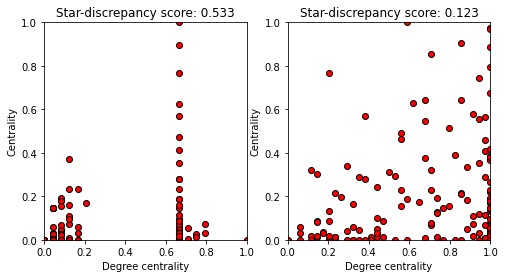

In [ ]:
def draw_plot(ax, data):
    
    ax = ax or plt.gca()
    
    aux = es.graph_metrics(data)
    ax.scatter(aux['Degree'], aux['Centrality'], edgecolor='k', c='r')
    ax.set_xlabel('Degree centrality')
    ax.set_ylabel('Centrality')
    ax.set_title(f'Star-discrepancy score: {es.objective(data):.3f}')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    plt.close()
    
    return ax


fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4))
ax1 = draw_plot(ax1, df)
ax2 = draw_plot(ax2, best)
plt.close()

fig